In [1]:
library(astsa)

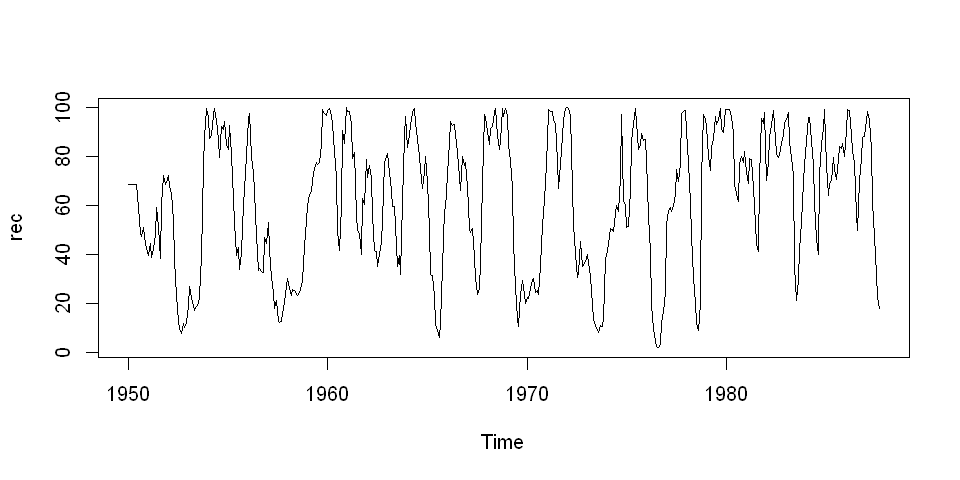

In [2]:
options(repr.plot.width=8, repr.plot.height=4)
plot(rec)

In [3]:
ts.data <- rec - mean(rec)

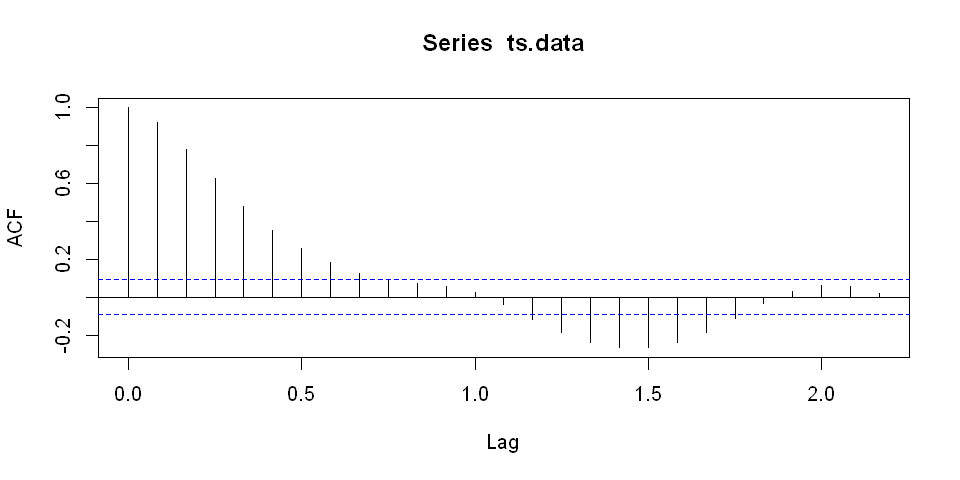

In [4]:
acf(ts.data)

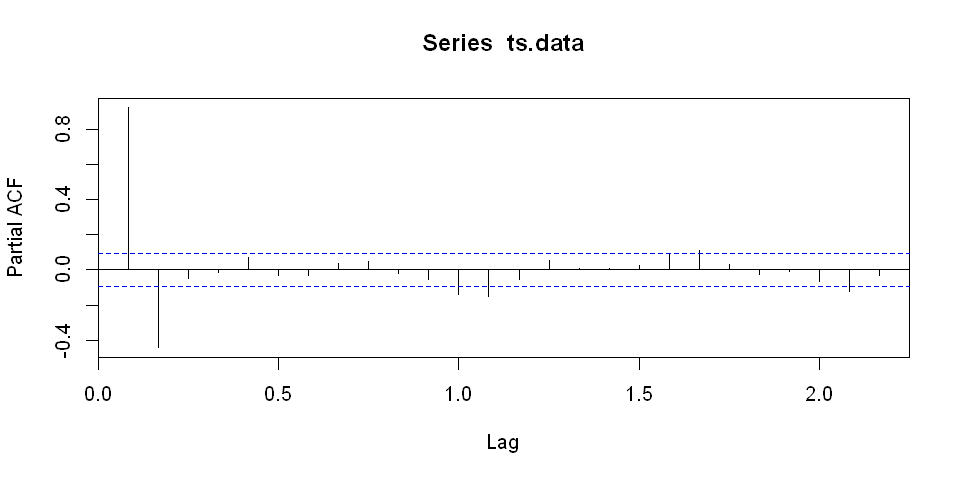

In [5]:
pacf(ts.data)

In [6]:
p <- 2
r <- acf(ts.data, plot=F)$acf[2:(p+1)]
r

[1] 0.9218042 0.7829182

In [7]:
R <- matrix(1, p, p)
for(i in 1:p) {
    for(j in 1:p) {
        if(i != j) {
            R[i, j] <- r[abs(i - j)]
        }
    }
}
R

1.0000000,0.9218042
0.9218042,1.0000000


In [8]:
b <- matrix(r, p, 1)
b

0.9218042
0.7829182


In [9]:
phi.hat <- solve(R, b)
phi.hat

1.3315874
-0.4445447


In [10]:
c0 <- acf(ts.data, type='covariance', plot=F)$acf[1]
var.hat <- c0*(1 - sum(phi.hat*r))
var.hat

[1] 94.17131

In [11]:
phi0.hat <- mean(rec) * (1 - sum(phi.hat))
phi0.hat

[1] 7.033036

In [12]:
cat("Constant:", phi0.hat,"\nCoeffcinets:", phi.hat, "\nVariance:", var.hat)

Constant: 7.033036 
Coeffcinets: 1.331587 -0.4445447 
Variance: 94.17131

Final model:

$$ X_t = 7.033036 + 1.331587 X_{t-1} - 0.4445447 X_{t-2} + e_t$$

where

$$ e_t \sim N(0, 94.17131) $$